In [ ]:

# Final Project: World News Bias
# Author: Murphy Campbell

# Reference
# https://www.mongodb.com/docs/v4.4/installation/
# https://pymongo.readthedocs.io/en/stable/tutorial.html
# https://github.com/Praxis-QR/BDSN/blob/main/KK_D1_MongoDB_Local_CRUD_operations.ipynb
# https://www.mongodb.com/docs/mongodb-shell/crud/read/
# https://www.mongodb.com/docs/manual/reference/operator/query/regex/

# https://www.adamerispaha.com/2017/07/09/scraping-headlines-with-cronjobs-python-and-mongodb/
# https://www.adamerispaha.com/2017/07/22/media-coverage-dynamics-mongodb-python/

# https://github.com/toxtli/rss-feed-crawler-cron-python-mongodb/blob/master/app.py
# https://scrapingant.com/blog/scrape-store-data-mongodb
# https://www.geeksforgeeks.org/convert-pymongo-cursor-to-dataframe/
# https://www.singlestore.com/blog/complete-guide-to-the-mongodb-sum-operator/
#


In [ ]:
import re
import string
import pandas as pd
import numpy as np
import scipy as sp
import sklearn
import sys
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter,OrderedDict


In [ ]:
# Mongobd install
# Install PyMongo library to connect to mongodb
!pip -qq install pymongo
from pymongo import MongoClient
import pandas as pd
import dateutil
import subprocess


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.6 MB/s eta 0:00:00


In [ ]:
#Install feedparser
!pip install feedparser

# URL Extractor
!pip install tldextract

# Stats module
!pip install pingouin

In [ ]:
import os
from os import remove
import glob
import time
import json

#!/usr/bin/env python
import feedparser
import datetime

# Upload files to filesystem, then use files.upload('/content/test/')
from google.colab import files

# load tldextract url extractor
import tldextract

import pingouin as pg

In [ ]:
!sudo apt-get install gnupg curl

In [ ]:
# To import the MongoDB public GPG key,
!curl -fsSL https://www.mongodb.org/static/pgp/server-8.0.asc | \
   sudo gpg -o /usr/share/keyrings/mongodb-server-8.0.gpg \
   --dearmor

In [ ]:
# Create the list file for Debian 12 (Bookworm):
!echo "deb [ signed-by=/usr/share/keyrings/mongodb-server-8.0.gpg ] http://repo.mongodb.org/apt/debian bookworm/mongodb-org/8.0 main" | sudo tee /etc/apt/sources.list.d/mongodb-org-8.0.list

deb [ signed-by=/usr/share/keyrings/mongodb-server-8.0.gpg ] http://repo.mongodb.org/apt/debian bookworm/mongodb-org/8.0 main


In [ ]:
!sudo apt-get update

In [ ]:
# Install Mongodb

!sudo apt-get install -y mongodb-org


In [ ]:
# debconf: unable to initialize frontend: Dialog
# debconf: (No usable dialog-like program is installed
# Have to install dialog
!apt install dialog -y

In [ ]:
!sudo apt install net-tools

In [ ]:
# ****** Important **********#
# Manually start MongoDB in background mode, to free up the terminal
!nohup mongod --config /etc/mongod.conf &
!mongod --version


nohup: appending output to 'nohup.out'
db version v8.0.4
Build Info: {
    "version": "8.0.4",
    "gitVersion": "bc35ab4305d9920d9d0491c1c9ef9b72383d31f9",
    "openSSLVersion": "OpenSSL 3.0.2 15 Mar 2022",
    "modules": [],
    "allocator": "tcmalloc-google",
    "environment": {
        "distmod": "debian12",
        "distarch": "x86_64",
        "target_arch": "x86_64"
    }
}


In [ ]:
# Connect to mongodb server with mongo client
mongodb_conn = "mongodb://localhost:27017/"
client = MongoClient(mongodb_conn)
client.list_database_names()

['admin', 'config', 'local']

In [ ]:
# create database new_db assigned to variable news_db
# Not seen until used
news_db = client['news_db']

In [ ]:
feeds_1 = {
"nytimes.com":"https://rss.nytimes.com/services/xml/rss/nyt/HomePage.xml",
"bbci.co.uk":"https://feeds.bbci.co.uk/news/world/rss.xml",
"nbcnews.com":"https://www.nbcnews.com/id/3032091/device/rss/rss.xml",
"cnn.com":"http://rss.cnn.com/rss/edition_world.rss",
"cnbc.com":"https://www.cnbc.com/id/100727362/device/rss/rss.html",
}




feeds_2 = {
"abcnews.go.com":"http://abcnews.go.com/abcnews/internationalheadlines",
"moxie.foxnews.com":"https://moxie.foxnews.com/google-publisher/latest.xml",
"aljazeera.com":"http://www.aljazeera.com/xml/rss/all.xml",
"cbsnews.com":"https://www.cbsnews.com/latest/rss/world",
}


feeds_3 = {
"france24.com":"https://www.france24.com/en/rss",
"dw.com":"https://www.dw.com/en/top-stories/s-9097",
"washingtonpost.com":"https://feeds.washingtonpost.com/rss/world",
"globalnews.ca":"https://globalnews.ca/world/feed/",
"time":"http://feeds.feedburner.com/time/world",
}

feeds_4 = {
"npr.org":"https://feeds.npr.org/1004/rss.xml",
"yahoo.com":"https://www.yahoo.com/news/rss/world/",
"washingtontimes.com":"http://www.washingtontimes.com/rss/headlines/news/world",
"smh.com.au":"http://www.smh.com.au/rssheadlines/world/article/rss.xml",
"skynews.com":"https://feeds.skynews.com/feeds/rss/world.xml",
}

feeds_5 = {
"latimes.com":"https://www.latimes.com/world/rss2.0.xml",
"timesofindia.indiatimes.com":"https://timesofindia.indiatimes.com/rssfeeds/296589292.cms",
"rt.com":"https://www.rt.com/rss/news/",
"feedspot.com":"https://www.feedspot.com/infiniterss.php?_src=feed_title&followfeedid=30969&q=site:",
"ndtvnews-world-news":"https://feeds.feedburner.com/ndtvnews-world-news",
}

feeds_6 = {
"thesun.co.uk":"https://www.thesun.co.uk/news/worldnews/feed/",
"globalissues.org":"https://www.globalissues.org/news/feed",
"mirror.co.uk":"http://www.mirror.co.uk/news/world-news/rss.xml",
"thecipherbrief.com":"https://www.thecipherbrief.com/feed",
"euronews.com":"https://www.euronews.com/news/international",
}

feeds_7 = {
"channelnewsasia.com":"http://www.channelnewsasia.com/rssfeeds/8395884",
"news24.com":"http://feeds.news24.com/articles/news24/World/rss",
"cbn.com":"https://www1.cbn.com/app_feeds/rss/news/rss.php?section=world&mobile=false&q=cbnnews/world/feed",
"watchdoguganda.com":"https://www.watchdoguganda.com/feed",
"globalpressjournal.com":"https://globalpressjournal.com/feed/",
}

feeds_8 = {
"radarr.africa":"https://radarr.africa/feed/",
"internetprotocol.co":"https://internetprotocol.co/rss/",
"bbcbreakingnews.com":"https://bbcbreakingnews.com/feed/",
"africalaunchpad.com":"https://africalaunchpad.com/feed/",
}



In [ ]:
mydict3 = {}

def rss_get_feeds(rss_feed):
  #grab the current time
  dt = datetime.datetime.utcnow()

  rss_parsed = feedparser.parse(rss_feed)

  # Get the current length of mydict3 to start appending from there
  current_len = len(mydict3)

  for i in range(len(rss_parsed.entries)):
      mydict3[current_len + i] = {} # Create a new key using current_len + i
      mydict3[current_len + i]['title'] = rss_parsed.entries[i].get('title', None)
      mydict3[current_len + i]['summary'] = rss_parsed.entries[i].get('summary', None)
      mydict3[current_len + i]['published'] = rss_parsed.entries[i].get('published', None)
      mydict3[current_len + i]['author'] = rss_parsed.entries[i].get('author', None)
      mydict3[current_len + i]['link'] = rss_parsed.entries[i].get('link', None)



  return mydict3


In [ ]:
# Function to create directories
def create_directory():
  !mkdir /content/mydata
  !mkdir /content/processed
  return

In [ ]:
 # Function to write json feed to file to /content/mydata

def json_file_write(mydict):
  dt1 = datetime.datetime.utcnow()
  dt2 = dt1.strftime("%Y-%m-%d")
  json_str1 = "json_feed_data_" + dt2 + ".json"

  !export json_str1
# json feed file with date
  src_file = os.path.join("/content/mydata/", json_str1)

  # Ensure the directory exists
  os.makedirs(os.path.dirname(src_file), exist_ok=True)

    # Write the entire dictionary to the file at once
  with open(src_file, "w", encoding='utf-8') as json_file:  # Use "w" to overwrite
    json.dump(mydict, json_file, indent=4)  # Use json.dump to write valid JSON

  return (src_file)




In [ ]:
def upload_files():

  src_path = os.path.join("/content/processed/")
  files.upload(src_path)

  return(src_path)



In [ ]:
# Function to load json feed files into mongodb

# ****** Worker to load news feeds json file into mongodb

def load_json_to_mongodb(news_db):

  import json
  import os
  # **** Require glob to load files ******#
  files = glob.glob('/content/processed/*.*')

  for file in files:

    with open(file, 'r') as f:
  #with open('/content/mydata/json_feed_data_21012025.json', 'r') as f:
      data = json.load(f)  # Load data from JSON file

# Convert the dictionary to a list of documents if it's not already a list
    if isinstance(data, dict):
    # If data is a dictionary, get its values as a list
      documents_to_insert = list(data.values())
    else:
      documents_to_insert = data  # If data is already a list, use it as is

# Insert data into the collection
    news_db.news.insert_many(documents_to_insert)

  return()


In [ ]:
# Function to load collection from mongodb into pandas dataframe

def load_collection_to_df(news_db):
  # Connecting to the database named news_db
  news2_db = news_db

  # Accessing the collection named news
  news_collection = news2_db.news

  # Now creating a Cursor instance
  # using find() function
  cursor = news_collection.find()
  print('Type of cursor:',type(cursor))

  # Converting cursor to the list of
  # dictionaries
  list_cur = list(cursor)

  # Converting to the DataFrame
  news_df = pd.DataFrame(list_cur)
  print('Type of df:',type(news_df))

  # Drop summary_details feature
  news_df.drop(['summary_details'], axis=1, inplace=True)
  # Printing the df to console
  print()
  print(news_df.head())

  return(news_df)



In [ ]:
# EXplorarity Data Analysis
# Count documents that are null

def count_nulls():
  len_news_db = news_db.news.count_documents({})
  title = news_db.news.count_documents({"title":None})
  summary = news_db.news.count_documents({"summary":None})
  published = news_db.news.count_documents({"published":None})
  author = news_db.news.count_documents({"author":None})
  links = news_db.news.count_documents({"link":None})
  #for num in range(len_news_db):

  print(f"{len_news_db} documents")
  print(f"{title} null title")

  print(f"{summary} null summary")
  print(f"{published} null published")
  print(f"{author} null author")
  print(f"{links} null links")

  # Create and return a DataFrame
  # This will allow you to use apply
  news_nulls_df = pd.DataFrame({
    'Field': ['title', 'summary', 'published', 'author', 'links'],
    'Null_Count': [title, summary, published, author, links]
    })
  return news_nulls_df




In [ ]:
count_nulls().sort_values('Null_Count')

7732 documents
0 null title
127 null summary
144 null published
2784 null author
0 null links


,Field,Null_Count
1,title,0
5,links,0
2,summary,127
3,published,144
4,author,2784
0,documents,7732


In [ ]:
def plot_news_nulls(news_nulls_df):

  from matplotlib import pyplot as plt
  import seaborn as sns

  plt.figure(figsize=(10, 6))  # Adjust figure size if needed
  plt.barh(news_nulls_df['Field'], news_nulls_df['Null_Count'], color=sns.palettes.mpl_palette('Dark2'))
  plt.title('World News Null Count by Features',fontsize= 16)
  plt.xlabel("Nulls")
  plt.ylabel("Features")

# Use null_df consistently
  plt.gca().spines[['top', 'right']].set_visible(False)  # Optional: remove top and right spines
  # Save plot
  plt.savefig('/content/mydata/plot_news_nulls.png')
  plt.show()

  return()



In [ ]:
news_db.news.count_documents({"author": {"$exists": True}})

7732

## Investigate the news articles with no authorship

## Create a filtered dataframe with author is None

In [ ]:
# ***** Function to filtered_news_df dataframe filtered to include authors with no names recorded
# and with news link not null
#
def filtered_news_df():
  filtered_news_df = news_df[(news_df.author.isnull()) & (news_df.link.notnull())]
  return(filtered_news_df)



In [ ]:
filtered_news_df.columns

In [ ]:
# Using tldextract to get domain name from urls
def get_domain_name(news_no_authors_df):
  news_no_authors_df['domain_name'] = news_no_authors_df['link'].apply(lambda x: tldextract.extract(x).domain)

  # Using groupby() and count()
# to get the count of each domain name
  news_no_authors_links_counts_df = news_no_authors_df.groupby(['domain_name'])['domain_name'].count()

  return(news_no_authors_links_counts_df)



In [ ]:
def plot_news_no_authors(news_no_authors_df):
    plt.figure(figsize=(16, 8))
    top_7 =7
    # Calculate domain name frequencies
    news_no_authors_links_counts_df = get_domain_name(news_no_authors_df)

    # Sort in descending order (highest at the top)
    sorted_df = news_no_authors_links_counts_df.sort_values(ascending=False)

    # Get the top 7 news sites
    sorted_top_7_df = sorted_df[:top_7]

    # Plot the bar chart
    plt.barh(sorted_top_7_df.index, sorted_top_7_df.values, color=sns.palettes.mpl_palette('Dark2'))
    plt.title('World News Sites That Serve Articles Without Authorship', fontsize=24,fontweight='bold')
    plt.xlabel("Counts of URL's (Uniform Resource Locators)",fontsize=20,fontweight='bold')
    plt.ylabel("News Organisation",fontsize=20,fontweight='bold')
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.xticks(fontsize=20,fontweight='bold')
    plt.yticks(fontsize=20,fontweight='bold')


    # Flip the y-axis to display highest at the top
    plt.ylim(plt.ylim()[::-1])  # Reverse the y-axis limits
    # Save plot
    plt.savefig('/content/mydata/plot_news_no_authors.png')
    plt.show()

    return sorted_top_7_df


In [ ]:
news_db.news.find_one()

{'_id': ObjectId('67aa6e5b09649388d92e9293'),
 'title': 'Dozens of Clinical Trials Have Been Frozen in Response to Trump’s USAID Order',
 'summary': 'The stop-work order on U.S.A.I.D.-funded research has left thousands of people with experimental drugs and devices in their bodies, with no access to monitoring or care.',
 'published': 'Thu, 06 Feb 2025 20:33:02 +0000',
 'author': 'Stephanie Nolen',
 'link': 'https://www.nytimes.com/2025/02/06/health/usaid-clinical-trials-funding-trump.html',
 'title_len': 77,
 'summary_len': 169}

In [ ]:

# Function to plot distribution of title lengths




def plot_news_title_length(news_db):
  # generate title length dataframes
  author_yes_len = news_db.news_authors_yes.find({"title_len": {"$ne": 0, "$exists": True}}, {"title_len": 1, "_id": 0}).to_list()
  author_no_len = news_db.news_authors_no.find({"title_len": {"$ne": 0, "$exists": True}}, {"title_len": 1, "_id": 0}).to_list()
  author_yes_len_df = pd.DataFrame(author_yes_len)
  author_no_len_df = pd.DataFrame(author_no_len)


  plt.figure(figsize=(14, 10))
  sns.kdeplot(author_yes_len_df['title_len'], label='Author Yes',linewidth=4)
  sns.kdeplot(author_no_len_df['title_len'], label='Author No',linewidth=4)
  sns.set_context("paper", rc={"figure.figsize": (14, 10)})
  #sns.set_context("paper", rc={"figure.figsize": (8, 6)})
  plt.title('Distribution Plot: News Title Length', fontsize =24 ,fontweight='bold')
  plt.xlabel('Title Length (Characters)',fontsize=20,fontweight='bold')
  plt.ylabel('Density',fontsize=20,fontweight='bold')
  plt.xticks(fontsize=20,fontweight='bold')
  plt.yticks(fontsize=20,fontweight='bold')
  plt.legend(fontsize=20)
  plt.savefig('/content/mydata/news_title_length.png')
  plt.show()
  return()


In [ ]:
#### Testing for top7 news sites serve news without author


## Get common news articles from the mongodb database

In [ ]:
# **** Worker ******* #
# Find common news articles
# from authors and non authors
# Function to find common titles article from authors and non authors
# and place reults in three pandas dataframe
def common_titles_cursor(news_db):
  collection = news_db["news"]

  # Define your cursor queries
  # Titles with authors
  authors_yes_cursor = collection.find({"author": {"$ne": None, "$exists": True}}, {"title": 1, "_id": 0})
 # Titles without authors
  authors_no_cursor = collection.find({"author": {"$type": 10}}, {"title": 1, "_id": 0})

# Generate documents from cursors
  authors_yes_titles = [doc["title"] for doc in authors_yes_cursor]
  authors_no_titles = [doc["title"] for doc in authors_no_cursor]

  # Put into list
  authors_yes_cursor_list = list(authors_yes_titles)
  authors_no_cursor_list = list(authors_no_titles)

# Find the intersection using sets
  common_titles = set(authors_yes_titles) & set(authors_no_titles)

 # Create pandas dataframe
  common_titles_df = pd.DataFrame(common_titles)
  authors_yes_title_df = pd.DataFrame(authors_yes_cursor_list,columns=['title',])
  authors_no_title_df = pd.DataFrame(authors_no_cursor_list,columns=['title',])

  # Calculate title length for each row and store in 'title_len'
  authors_no_title_df['title_len'] = authors_no_title_df['title'].apply(lambda title: len(title))
  authors_yes_title_df['title_len'] = authors_yes_title_df['title'].apply(lambda title: len(title))

  return common_titles_df, authors_no_title_df, authors_yes_title_df


In [ ]:
# **** Worker ******* #
# Find common news articles
# from authors and non authors
# Function to find common summary articles from authors and non authors
def common_summary_cursor(news_db):
  collection = news_db["news"]

  # Define your cursor queries
  # Summary with authors
  authors_yes_cursor = collection.find({"author": {"$ne": None, "$exists": True}}, {"summary": 1, "_id": 0})
 # Summary without authors
  authors_no_cursor = collection.find({"author": {"$type": 10}}, {"summary": 1, "_id": 0})

# Generate documents from cursors
  authors_yes_summary = [doc["summary"] for doc in authors_yes_cursor]
  authors_no_summary = [doc["summary"] for doc in authors_no_cursor]

# Put into list
  authors_yes_summary_list = list(authors_yes_summary)
  authors_no_summary_list = list(authors_no_summary)


# Find the intersection using sets
  common_summary = set(authors_yes_summary_list) & set(authors_no_summary_list)


 # Create pandas dataframe
  common_summary_df = pd.DataFrame(common_summary)

  authors_yes_summary_df = pd.DataFrame(authors_yes_summary_list)
  authors_no_summary_df = pd.DataFrame(authors_no_summary_list)

  return common_summary_df, authors_yes_summary_df, authors_no_summary_df



In [ ]:
# Function to cast title string field records into integers


def update_documents_with_title_len(news_db):

  # Adds a 'title_len' field to documents in the 'news' collection,
  # storing the length of the title string.

  for document in news_db.news.find():
    # Get the title, defaulting to "" if not found
    title = document.get("title", "")
    # Get the length of the title string
    title_len = len(title)
    news_db.news.update_one({"_id": document["_id"]}, {"$set": {"title_len": title_len}})

  print("Documents updated with 'title_len' field.")
  return()


In [ ]:
# Function to cast summary string field records into integers


def update_documents_with_summary_len(news_db):

  # Adds a 'summary_len' field to documents in the 'news' collection,
  # storing the length of the summary string.

  for document in news_db.news.find():
    # Get the summary, defaulting to "" if not found
    summary = document.get("summary", "")
    # Check if summary is None and set to empty string
    if summary is None:
      summary = ""
    # Get the length of the summary string
    summary_len = len(summary)
    news_db.news.update_one({"_id": document["_id"]}, {"$set": {"summary_len": summary_len}})

  print("Documents updated with 'summary_len' field.")
  return()


In [ ]:
# Function to create two collection news_authors_yes and news_authors_no
# Copy news collection to news_authors_yes and news_authors_no
# Remove documents from news_authors_yes where authors is None, and
# Remove documents from news_authors_no where authors is Not None

def make_news_collection(news_db):
  # create another collection
  news_db.create_collection("news_authors_yes")
  news_db.create_collection("news_authors_no")
  # Copy news collection to news_authors_yes, and news_authors_no collection
  news_db.news.aggregate([{"$out": "news_authors_yes"}])
  news_db.news.aggregate([{"$out": "news_authors_no"}])
  ## Remove documents from collections for authors yes, authors no
# This create to sets of the News Data: news_authors_yes, and news_authors_no
  news_db.news_authors_yes.delete_many({'author': {'$eq': None}})
  news_db.news_authors_no.delete_many({'author': {'$ne': None}})

  return news_db



In [ ]:
# Funtion to find common titles between authors and non authors

def common_titles_cursor_dataframe(news_db):
  result = news_db.news_authors_no.aggregate([
    {
        "$lookup": {
            # The collection to join with
            "from": "news_authors_yes",
            # Field from the input collection
            "localField": "title",
            # Field from the 'news_authors_yes' collection
            "foreignField": "title",
            # Name of the new array field
            "as": "matching_documents"
        }
    },
    {
        "$match": {
            # Filter for documents with matches
            "matching_documents": {"$ne": []}
        }
    },
    {
        "$project": {
            "title": 1,
            "author": 1,
            "link": 1,
            "published": 1,

        }
    }
  ]).to_list()

  common_titles_df = pd.DataFrame(result)
  return(common_titles_df)



def common_titles_freqs(common_titles_df):

# Finds duplicate titles, includes published dates, and plots the top N.

  top_n = 32
  title_len = 65
  title_freqs = 1
  # Parse links url with tldextract.extract(x).domain for domain name and save in domain_columns
  common_titles_df['domain_name'] = common_titles_df['link'].apply(lambda x: tldextract.extract(x).domain)

  common_titles_df['title_freq'] = common_titles_df.groupby('title')['title'].transform('count')
# Calculate title length for each row and store in 'title_len'
  common_titles_df['title_len'] = common_titles_df['title'].apply(lambda title: len(title))
  common_titles_df['domain_freq'] = common_titles_df.groupby('domain_name')['domain_name'].transform('count')

  freq_titles_df = common_titles_df[
    (common_titles_df['title_freq'] > title_freqs) & (common_titles_df['title_len'] > title_len)]

  freq_titles_df = freq_titles_df[['title', 'title_freq', 'published', 'domain_name','title_len','domain_freq']]
  top_titles_df = freq_titles_df.sort_values(by=['title_freq'], ascending=False).head(top_n)

# Remove duplicates
  top_titles_df = top_titles_df.drop_duplicates(subset=['title'])

  return top_titles_df



In [ ]:
def plot_common_top_titles(top_titles_df):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8, 12))
  plt.title(f"Top  Common News Titles between authors and non-authors", fontsize=24,)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)

  df_2dhist = pd.DataFrame({
    #x_label: grp['published'].value_counts()
    x_label: grp['domain_name'].value_counts()
    for x_label, grp in top_titles_df.groupby('title')
  })
  sns.heatmap(df_2dhist, cmap='viridis',vmin = -1, vmax = 1,)
#plt.xlabel('title')
  _ = plt.ylabel('domain_name',fontsize=20)

  return()


Saving json_feed_data_2025-02-08.json to /content/processed/json_feed_data_2025-02-08.json
Saving json_feed_data_2025-02-07.json to /content/processed/json_feed_data_2025-02-07.json
Saving json_feed_data_2025-02-06.json to /content/processed/json_feed_data_2025-02-06.json
Saving json_feed_data_2025-02-05.json to /content/processed/json_feed_data_2025-02-05.json
Saving json_feed_data_2025-02-04.json to /content/processed/json_feed_data_2025-02-04.json
Saving json_feed_data_2025-02-03.json to /content/processed/json_feed_data_2025-02-03.json
Saving json_feed_data_2025-01-31.json to /content/processed/json_feed_data_2025-01-31.json
Saving json_feed_data_2025-01-30.json to /content/processed/json_feed_data_2025-01-30.json
Saving json_feed_data_2025-01-29.json to /content/processed/json_feed_data_2025-01-29.json
Saving json_feed_data_2025-01-28.json to /content/processed/json_feed_data_2025-01-28.json
Saving json_feed_data_2025-01-27.json to /content/processed/json_feed_data_2025-01-27.json

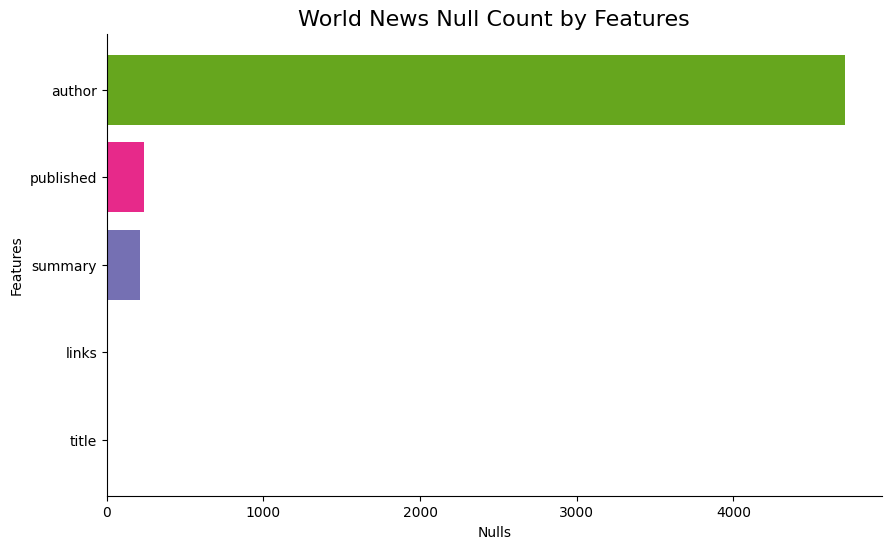

********** 
 *
 *
 *
 *
 * **********


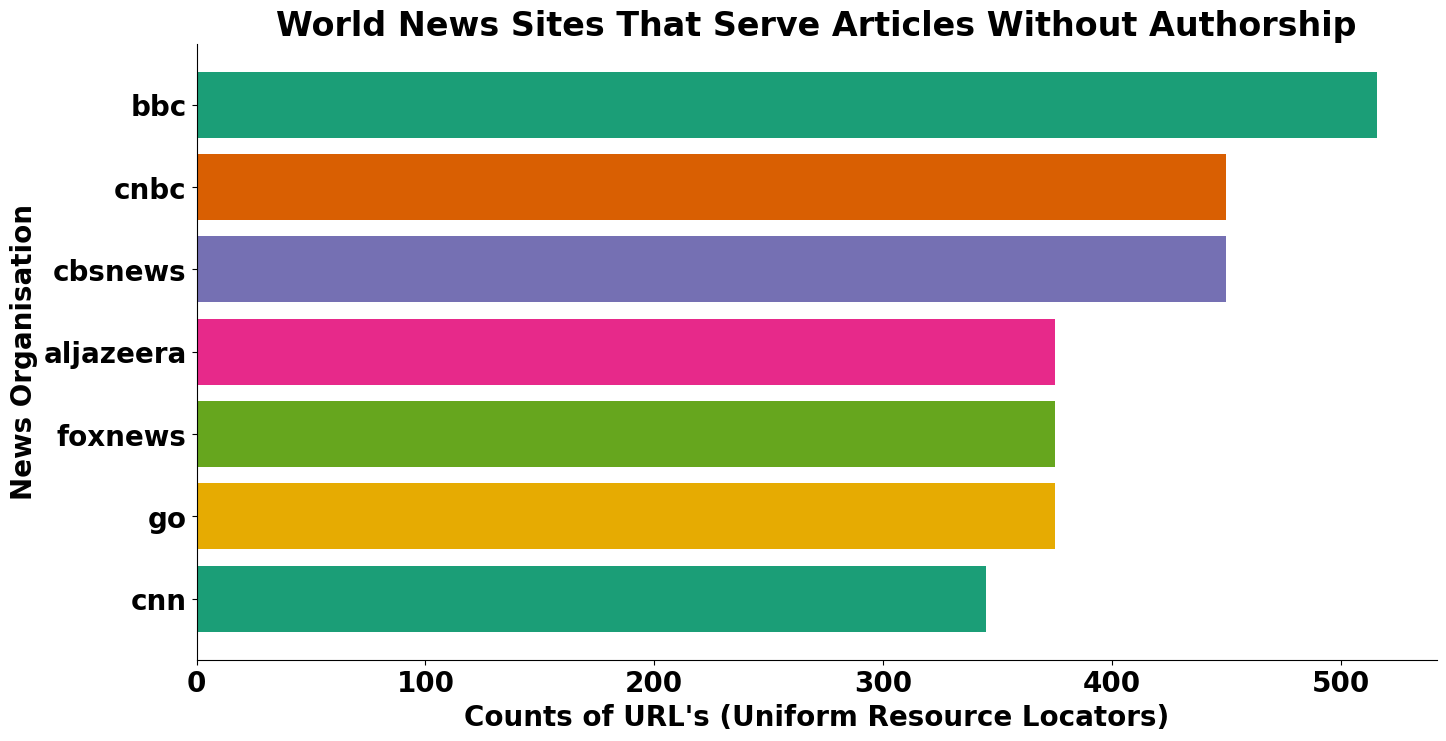

********** 
 *
 *
 *
 *
 * **********
Documents updated with 'title_len' field.
Documents updated with 'summary_len' field.
********** 
 *
 *
 *
 *
 *
 *
 *
 *
 *
 * **********


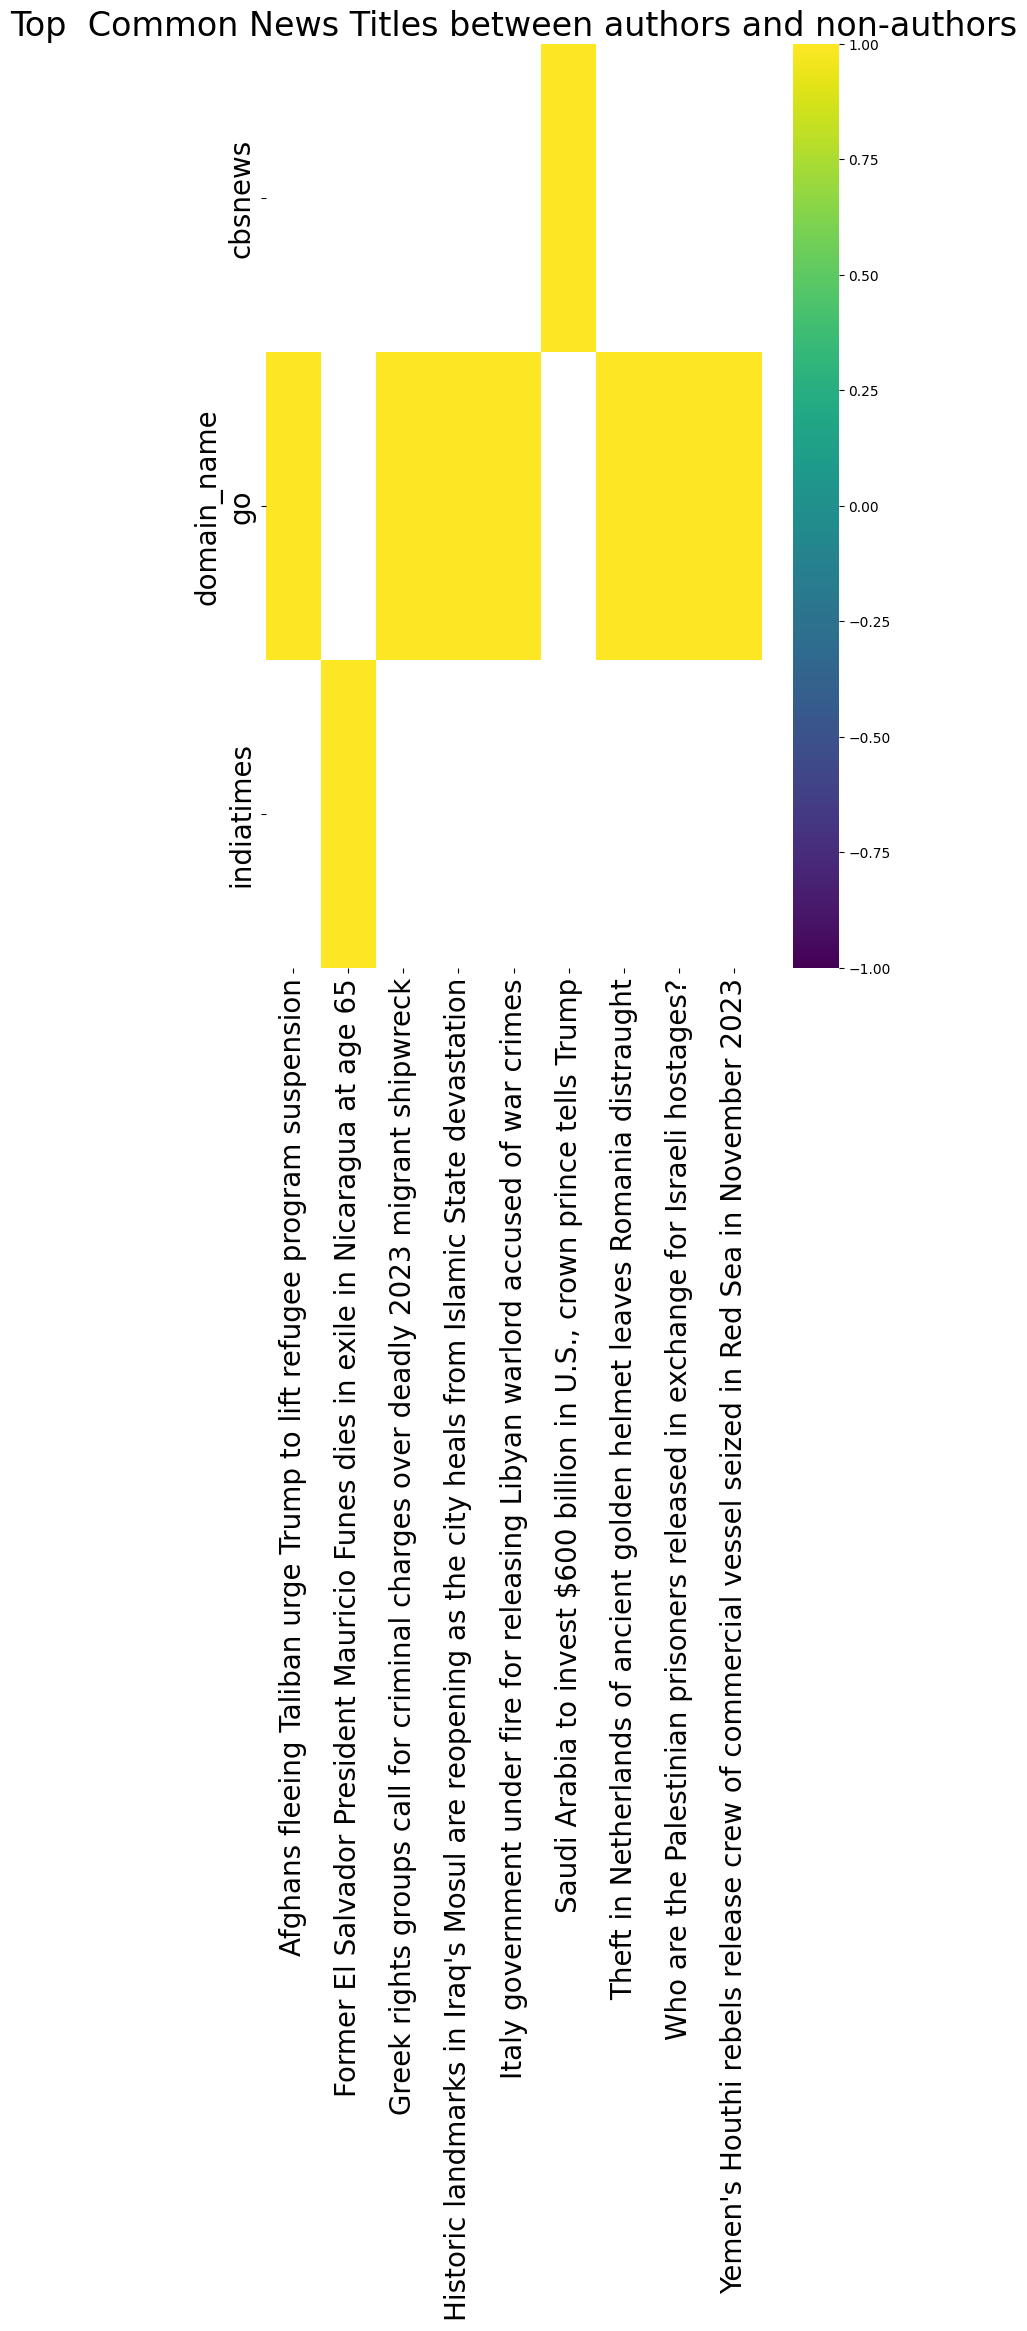

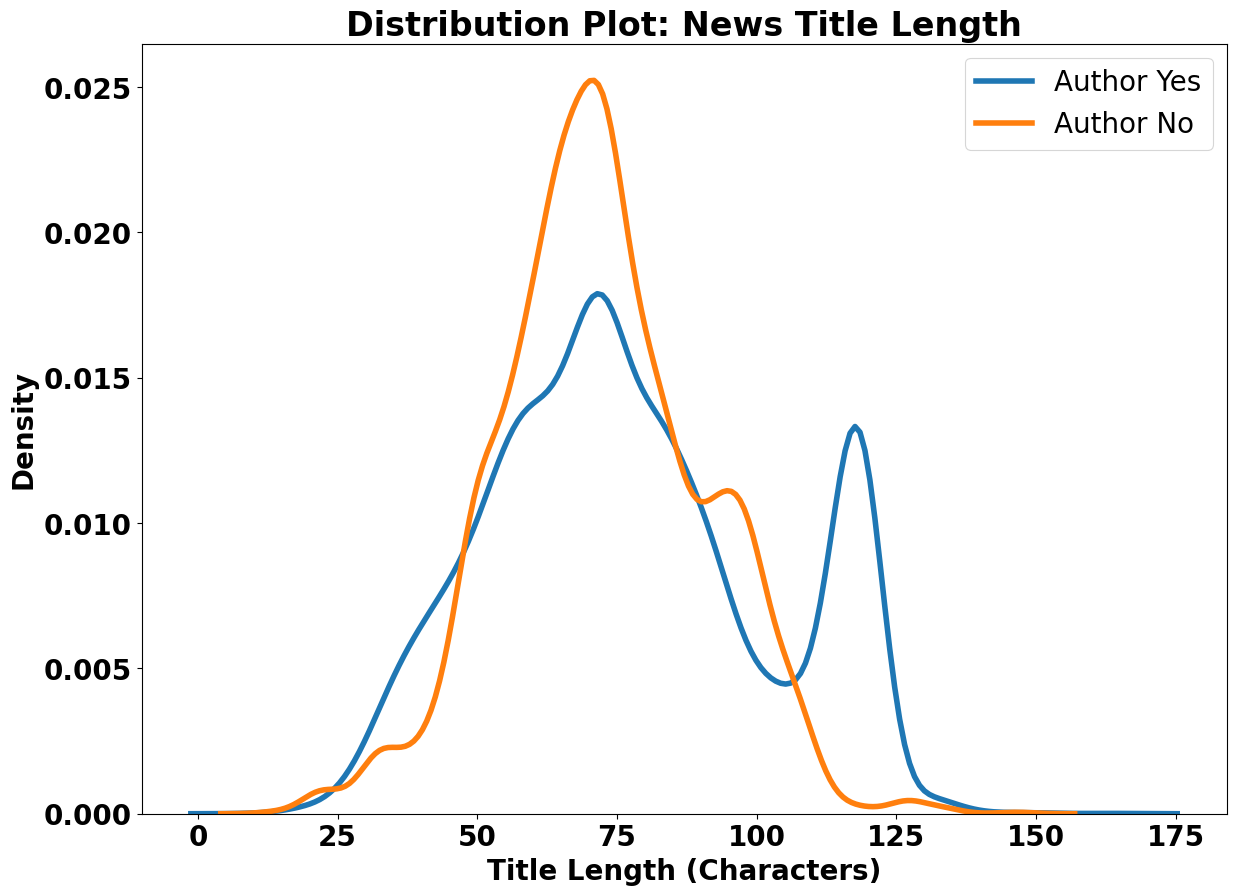

********** 
 *
 *
 *
 *
 * **********


In [ ]:

### === Main ====##



feed_list = [feeds_1, feeds_2, feeds_3, feeds_4, feeds_5, feeds_6, feeds_7, feeds_8]

# Nested for loop to load with
# with rss_get_feeds() function to get rss news feeds
for feeds in feed_list:
  for feed_url in feeds.values():

    rss_get_feeds(feed_url)


# Run function to create directories
create_directory()
# Run function to dump feeds dictionary to json data type  ***#
#json_file_write(mydict3)

#src_file = json_file_write(mydict3)
src_file = json_file_write(mydict3)
# Up loads files to OS filesystem on google colab
upload_files()

# Load json feed files from directory into mongodb dabase
load_json_to_mongodb(news_db)

# Load mongodb collection to pandas dataframe
news_df = load_collection_to_df(news_db)

# Count documents in news collection
news_db.command("count", value=news_db.news.name)

# Query mongo collection with regex
news_db.news.find({"summary": {"$regex": "bad"}}).to_list()



# ***** EXplorarity Data Analysis  ******#
# Count documents that are null







### ****** All Plots must be put into functions above Main  *****#

# Applying sort_values to Null_Count column for better readability.
news_nulls_df = count_nulls().sort_values(by=['Null_Count'], ascending=True)

# plot news nulls
plot_news_nulls(news_nulls_df)
# Spacing between plots
print("*"*10,"\n *"*5, "*"*10)

# ***** Call to function to filtered_news_df dataframe filtered to include authors with no names recorded
# and with news link not null
news_no_authors_df  = filtered_news_df()


# Call to plot news sites that serve news articles without authorship
#plot_news_no_authors(get_domain_name(news_no_authors_df))
sorted_top_7_df = plot_news_no_authors(news_no_authors_df)

# Spacing between plots
print("*"*10,"\n *"*5, "*"*10)


# Call to get common title, summary from mongodb news collection
# return three dataframes
common_titles_df, authors_no_title_df, authors_yes_title_df = common_titles_cursor(news_db)
common_summary_df, authors_yes_summary_df, authors_no_summary_df = common_summary_cursor(news_db)

# Call the function to update documents
update_documents_with_title_len(news_db)
update_documents_with_summary_len(news_db)

# Call to make two new collections
make_news_collection(news_db)

# Call to get common titles and dump into pandas dataframe
common_titles_df = common_titles_cursor_dataframe(news_db)

# Call to get common title frequencies
top_titles_df = common_titles_freqs(common_titles_df)

# Spacing between plots
print("*"*10,"\n *"*5, "*"*10)


# Call to plot common titles
plot_common_top_titles(top_titles_df)

# Spacing between plots
print("*"*10,"\n *"*5, "*"*10)


# Call to function to plot title lengths
plot_news_title_length(news_db)

# Spacing between plots
print("*"*10,"\n *"*5, "*"*10)





####



### End ####

## Create a filtered dataframe with author is None

In [ ]:
# generate title length dataframes
author_yes_len = news_db.news_authors_yes.find({"title_len": {"$ne": 0, "$exists": True}}, {"title_len": 1, "_id": 0}).to_list()
author_no_len = news_db.news_authors_no.find({"title_len": {"$ne": 0, "$exists": True}}, {"title_len": 1, "_id": 0}).to_list()
author_yes_len_df = pd.DataFrame(author_yes_len)
author_no_len_df = pd.DataFrame(author_no_len)

In [ ]:
# Check if data is skewed > 0.7
print(f" author no {author_no_len_df.skew()}")
print(f" author yes {author_yes_len_df.skew()}")

 author no title_len    0.120074
dtype: float64
 author yes title_len    0.245702
dtype: float64


In [ ]:
authors_no_title_df.iloc[0].to_list()

["'My beauty, you're home': Israeli women soldiers reunited with families", 71]

In [ ]:
author_yes_len_df.skew()

,0
title_len,0.251277


In [ ]:
from scipy.stats import ttest_ind
from scipy import stats

In [ ]:
#perform independent two sample t-test
ttest_ind(author_yes_len_df['title_len'], author_no_len_df['title_len'])


TtestResult(statistic=12.356291908905245, pvalue=7.074864299766254e-35, df=12976.0)

In [ ]:
# Welch’s t-Test: Two sample t-Test is used to compare the means of two different independent datasets
stats.ttest_ind(author_yes_len_df['title_len'], author_no_len_df['title_len'],equal_var = 'False')

TtestResult(statistic=12.356291908905245, pvalue=7.074864299766254e-35, df=12976.0)

In [ ]:
## Using the internal function from SciPy Package
t_stat, p_val = stats.ttest_ind(author_yes_len_df['title_len'], author_no_len_df['title_len'])
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = 12.356291908905245
p-value = 7.074864299766254e-35


In [ ]:
# Welch's T-Test
!pip install pingouin
from pingouin import ttest



In [ ]:
# Welch's T-Test
ttest(author_yes_len_df['title_len'], author_no_len_df['title_len'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,13.470657,12274.499004,two-sided,4.555661e-41,"[4.35, 5.83]",0.22556,2.497e+37,1.0


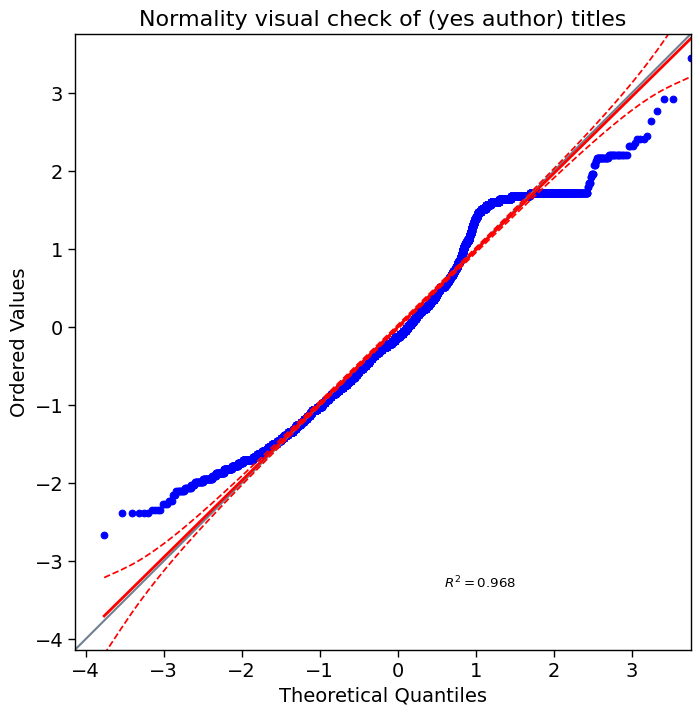

In [ ]:
 #Create a figure and axes with the desired figsize
fig, ax = plt.subplots(figsize=(10, 8))

# Call pg.qqplot, passing the axes object
ax = pg.qqplot(author_yes_len_df, dist='norm', confidence=0.95, ax=ax)

#ax = pg.qqplot(author__len_df, dist='norm')
ax.set_title('Normality visual check of (yes author) titles',fontsize=16)
ax.set_xlabel('Theoretical Quantiles',fontsize=14)
ax.set_ylabel('Ordered Values',fontsize=14)

 #Set x and y tick font size
ax.tick_params(axis='x', labelsize=14)  # Adjust 16 to your desired size
ax.tick_params(axis='y', labelsize=14)  # Adjust 16 to your desired size



ax.get_figure().savefig('/content/mydata/qqplot_yes.png')


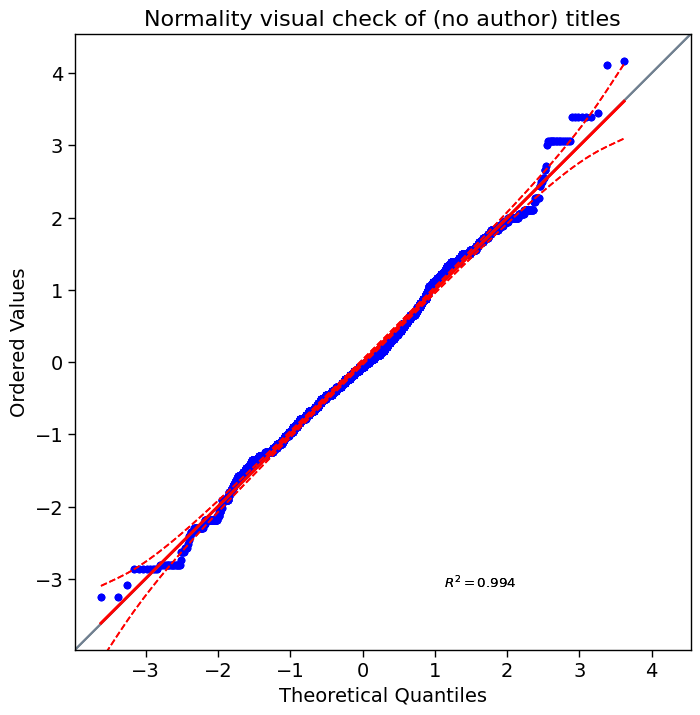

In [ ]:
 #Create a figure and axes with the desired figsize
fig, ax = plt.subplots(figsize=(10, 8))

# Call pg.qqplot, passing the axes object
ax = pg.qqplot(author_no_len_df, dist='norm', confidence=0.95, ax=ax)

ax = pg.qqplot(author_no_len_df, dist='norm')
ax.set_title('Normality visual check of (no author) titles',fontsize=16)
ax.set_xlabel('Theoretical Quantiles',fontsize=14)
ax.set_ylabel('Ordered Values',fontsize=14)

 #Set x and y tick font size
ax.tick_params(axis='x', labelsize=14)  # Adjust 16 to your desired size
ax.tick_params(axis='y', labelsize=14)  # Adjust 16 to your desired size



In [ ]:
# Create descriptive stats for titles
authors_no_title_stats_df = authors_no_title_df.describe().loc[['min','max','mean','std',]]
authors_yes_title_stats_df = authors_yes_title_df.describe().loc[['min','max','mean','std',]]

# prompt: Using dataframe authors_no_title_stats_df: horizontal bar

import altair as alt

# Reset the index to make it a column
authors_no_title_stats_df = authors_no_title_stats_df.reset_index()
authors_yes_title_stats_df = authors_yes_title_stats_df.reset_index()

# *** Worker *****#





# *** Worker *****#



# Ensure 'title_len' column is numeric
authors_no_title_stats_df['title_len'] = pd.to_numeric(authors_no_title_stats_df['title_len'], errors='coerce')

# Create the horizontal bar chart with colored bars and large title
(alt.Chart(authors_no_title_stats_df)
    .mark_bar(height=40)  # Adjust the height value here
    .encode(
        alt.X('title_len:Q', title='Title Length', axis=alt.Axis(labelFontSize=18,titleFontSize=18)),  # Increase x-axis tick font size
        alt.Y('index:N', title='Statistic', sort='-x', axis=alt.Axis(labelFontSize=18,titleFontSize=18)),  # Increase y-axis tick font size
        alt.Color('index:N', scale=alt.Scale(scheme='category10'))
    )
    .properties(
        title={
            "text": "Descriptive Statistics of News Title Lengths (No Author)",
            "fontSize": 26,  # Adjust font size as needed
            "anchor": "start",  # Align title to the left (start)
            # Add other formatting options if desired
        },
        width=800,  # Adjust width as needed
        height=400   # Adjust height as needed
    )
)



alt.Chart(...)

In [ ]:
# Ensure 'title_len' column is numeric
authors_yes_title_stats_df['title_len'] = pd.to_numeric(authors_yes_title_stats_df['title_len'], errors='coerce')

# Create the horizontal bar chart with colored bars and large title
(alt.Chart(authors_yes_title_stats_df)
    .mark_bar(height=40)  # Adjust the height value here
    .encode(
        alt.X('title_len:Q', title='Title Length', axis=alt.Axis(labelFontSize=18,titleFontSize=18)),  # Increase x-axis tick font size
        alt.Y('index:N', title='Statistic', sort='-x', axis=alt.Axis(labelFontSize=18,titleFontSize=18)),  # Increase y-axis tick font size
        alt.Color('index:N', scale=alt.Scale(scheme='category10'))
    )
    .properties(
        title={
            "text": "Descriptive Statistics of News Title Lengths (Yes Author)",
            "fontSize": 26,  # Adjust font size as needed
            "anchor": "start",  # Align title to the left (start)
            # Add other formatting options if desired
        },
        width=800,  # Adjust width as needed
        height=400   # Adjust height as needed
    )
)


alt.Chart(...)

In [ ]:
news_db.news.count_documents({})

12978

In [ ]:
top_common_titles_list = top_titles_df['title'].to_list()

In [ ]:
top_common_titles_list

['Saudi Arabia to invest $600 billion in U.S., crown prince tells Trump',
 'Who are the Palestinian prisoners released in exchange for Israeli hostages?',
 'Former El Salvador President Mauricio Funes dies in exile in Nicaragua at age 65',
 'Afghans fleeing Taliban urge Trump to lift refugee program suspension',
 "Yemen's Houthi rebels release crew of commercial vessel seized in Red Sea in November 2023",
 'Italy government under fire for releasing Libyan warlord accused of war crimes',
 'Greek rights groups call for criminal charges over deadly 2023 migrant shipwreck',
 "Historic landmarks in Iraq's Mosul are reopening as the city heals from Islamic State devastation",
 'Theft in Netherlands of ancient golden helmet leaves Romania distraught']

In [ ]:
author_no_len = news_db.news_authors_no.find({"title_len": {"$ne": 0, "$exists": True}}, {"title_len": 1, "_id": 0}).to_list()

In [ ]:
author_yes_len_df = pd.DataFrame(author_yes_len)

In [ ]:
news_db.list_collection_names()

['news_authors_yes', 'news', 'news_authors_no']

In [ ]:
news_db.news_authors_no.find_one()

{'_id': ObjectId('67ab53e38c5afe1e4952a469'),
 'title': 'Trump says Israel will hand over Gaza to US after fighting ends',
 'summary': 'The president reiterates that the idea would mean resettling Palestinians, and that no US soldiers would be needed.',
 'published': 'Thu, 06 Feb 2025 17:37:32 GMT',
 'author': None,
 'link': 'https://www.bbc.com/news/articles/c4g9xgj2429o',
 'title_len': 63,
 'summary_len': 115}

In [ ]:
news_db.news_authors_yes.find_one()

{'_id': ObjectId('67ab53e38c5afe1e4952a44e'),
 'title': 'Dozens of Clinical Trials Have Been Frozen in Response to Trump’s USAID Order',
 'summary': 'The stop-work order on U.S.A.I.D.-funded research has left thousands of people with experimental drugs and devices in their bodies, with no access to monitoring or care.',
 'published': 'Thu, 06 Feb 2025 20:33:02 +0000',
 'author': 'Stephanie Nolen',
 'link': 'https://www.nytimes.com/2025/02/06/health/usaid-clinical-trials-funding-trump.html',
 'title_len': 77,
 'summary_len': 169}

In [ ]:
# Explorarity Data Analysis on the authors no collection

news_authors_no_list = news_db.news_authors_no.aggregate([
  {
    "$group": {
      "_id": "null",
      "authors_no_count": {"$sum": 1},
      "Min_title": {"$min": "$title_len"},
      "Max_title": {"$max": "$title_len"},
      "Mean_title": {"$avg": "$title_len"},
      "Median_title": {"$median": {
          "input": "$title_len", "method": "approximate"}},
      "Title_Standard deviation": {"$stdDevSamp": "$title_len"},
      "Min_summary": {"$min": "$summary_len"},
      "Max_summary": {"$max": "$summary_len"},
      "Mean_summary": {"$avg": "$summary_len"},
      "Median_summary": {"$median": {
          "input": "$summary_len", "method": "approximate"}},
      "Summary_Standard deviation": {"$stdDevSamp": "$summary_len"},
    }
  },
  {
    "$project": {
      "_id": 0,
      "authors_no_count":1,
      "Min_title": 1,
      "Max_title": 1,
      "Mean_title": 1,
      "Median_title": 1,
      "Title_Standard deviation": 1,
      "Min_summary": 1,
      "Max_summary": 1,
      "Mean_summary": 1,
      "Median_summary": 1,
      "Summary_Standard deviation": 1,
    }
  }
]).to_list()

In [ ]:
# Explorarity Data Analysis on the authors yes collection
news_authors_yes_list = news_db.news_authors_yes.aggregate([
  {
    "$group": {
      "_id": "null",
      "authors_yes_count": {"$sum": 1},  # Changed "authors yes" to an accumulator object using $sum
      "Min_title": {"$min": "$title_len"},
      "Max_title": {"$max": "$title_len"},
      "Mean_title": {"$avg": "$title_len"},
      "Median_title": {"$median": {
          "input": "$title_len", "method": "approximate"}},
      "Title_Standard deviation": {"$stdDevSamp": "$title_len"},
      "Min_summary": {"$min": "$summary_len"},
      "Max_summary": {"$max": "$summary_len"},
      "Mean_summary": {"$avg": "$summary_len"},
      "Median_summary": {"$median": {
          "input": "$summary_len", "method": "approximate"}},
      "Summary_Standard deviation": {"$stdDevSamp": "$summary_len"},
    }
  },
  {
    "$project": {
      "_id": 0,
      "authors_yes_count":1,
      "Min_title": 1,
      "Max_title": 1,
      "Mean_title": 1,
      "Median_title": 1,
      "Title_Standard deviation": 1,
      "Min_summary": 1,
      "Max_summary": 1,
      "Mean_summary": 1,
      "Median_summary": 1,
      "Summary_Standard deviation": 1,
    }
  }
]).to_list()

In [ ]:
news_authors_no_list

[{'authors_no_count': 3736,
  'Min_title': 14,
  'Max_title': 147,
  'Mean_title': 72.2240364025696,
  'Median_title': 71.0,
  'Title_Standard deviation': 17.975853814391485,
  'Min_summary': 0,
  'Max_summary': 1352,
  'Mean_summary': 164.38088865096358,
  'Median_summary': 141.33333333333334,
  'Summary_Standard deviation': 137.83318885736108}]

In [ ]:
news_authors_yes_list

[{'authors_yes_count': 6587,
  'Min_title': 18,
  'Max_title': 163,
  'Mean_title': 77.24426901472597,
  'Median_title': 74.0,
  'Title_Standard deviation': 24.8271949674895,
  'Min_summary': 0,
  'Max_summary': 987,
  'Mean_summary': 228.22028237437377,
  'Median_summary': 170.0,
  'Summary_Standard deviation': 186.59538347685137}]